In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [5]:
df.shape

(100, 4)

In [6]:
df = df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
# Steps

# 0. Preprocess + EDA + Feature Selection ->preprocess by removing 0th column in above step- (df = df.iloc[:,1:]) because it was not required
# 1. Extract input and output cols
# 2. Scale the values ->to bring highly varying values in range(x & y axis values have vary highly eg- age of a person can be between 0 to 120 max but salary can go upto lakhs so here)
# x & y values are varying very much and thus the distance will be more and the model may face problems in prediction
# 3. Train test split ->to test the the model with training data which was not used for training but we have the output so that we can compare the results (actual & predicted output)
# 4. Train the model
# 5. Evaluate the model/model selection -> evaluate diff algos & choose the algo/model which performs best(not doing this in this project)
# 6. Deploy the model -> deploying on the server after integrating with the software application.

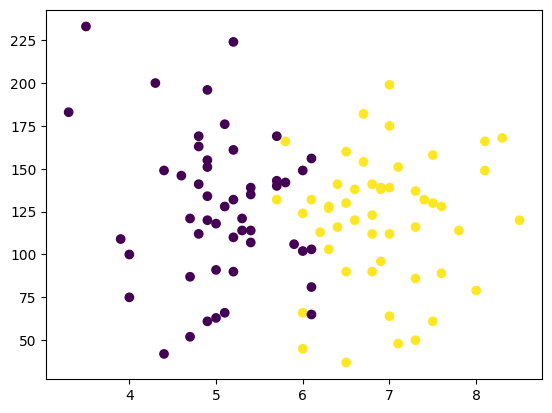

In [9]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement']) #cgpa is x asis, iq is y axis and the placement is with colors, yellow means placed(1), violet means not placed (0)

In [14]:
# step -3 extracting input & output cols
x = df.iloc[:,0:2] #input cols, independent variables
y = df.iloc[:,-1] #output col, dependent variable

In [15]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [16]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [20]:
x_train

,cgpa,iq
32,7.0,139.0
77,7.3,50.0
46,5.3,114.0
81,5.4,107.0
56,6.1,65.0
...,...,...
68,4.0,75.0
80,4.9,196.0
94,4.7,52.0
58,8.0,79.0


In [21]:
y_train

32    1
77    1
46    0
81    0
56    0
     ..
68    0
80    0
94    0
58    1
96    0
Name: placement, Length: 90, dtype: int64

In [22]:
x_test #random values which will be used for testing

,cgpa,iq
18,4.0,100.0
42,7.6,89.0
14,6.1,103.0
35,6.8,90.0
47,5.2,161.0
15,5.1,176.0
6,5.7,143.0
55,7.8,114.0
53,8.3,168.0
40,4.9,134.0


In [23]:
y_test # actual output for these as per our given data i.e placement column corresponding to these random inputs

18    0
42    1
14    0
35    1
47    0
15    0
6     0
55    1
53    1
40    0
Name: placement, dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler #for scaling the values, not necessary fo this projects

scaler = StandardScaler() ##scaler is an object which will be used to access the StandardScaler function


In [25]:
x_train = scaler.fit_transform(x_train)

In [26]:
x_train

array([[ 0.92472897,  0.39190115],
       [ 1.19494199, -1.80329342],
       [-0.60647809, -0.22472654],
       [-0.51640709, -0.39738229],
       [ 0.11408994, -1.43331681],
       [-0.24619408,  0.2192454 ],
       [ 0.02401893,  0.63855223],
       [-1.14690412, -0.05207078],
       [-0.8766911 , -0.79202401],
       [-0.24619408,  1.13185438],
       [ 0.11408994, -1.03867509],
       [ 0.56444496,  0.36723605],
       [-0.6965491 ,  2.4884353 ],
       [ 1.19494199,  0.34257094],
       [-0.6965491 , -0.81668912],
       [ 0.92472897,  1.27984503],
       [ 0.47437395,  0.90986841],
       [-0.6965491 , -0.32338697],
       [ 0.47437395, -2.12393982],
       [-0.51640709,  0.29324072],
       [ 1.01479998,  0.68788244],
       [-0.96676211,  0.68788244],
       [-2.40789817,  1.47716589],
       [-0.7866201 , -1.4086517 ],
       [ 1.91551002,  1.05785906],
       [ 0.83465797, -0.66869847],
       [ 0.02401893, -0.52070783],
       [ 0.29423195, -0.49604272],
       [-1.14690412,

In [27]:
x_test = scaler.transform(x_test) #similarly scaling testing data

x_test

array([[-1.77740114, -0.57003804],
       [ 1.465155  , -0.84135423],
       [ 0.11408994, -0.49604272],
       [ 0.74458697, -0.81668912],
       [-0.6965491 ,  0.93453352],
       [-0.7866201 ,  1.30451013],
       [-0.24619408,  0.49056158],
       [ 1.64529701, -0.22472654],
       [ 2.09565202,  1.10718927],
       [-0.96676211,  0.26857562]])

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf = LogisticRegression()

In [31]:
# model training
clf.fit(x_train,y_train) #using logistic regression ( classification)

LogisticRegression()

In [33]:
y_pred = clf.predict(x_test) # Pass x_test (test features) to predict

In [34]:
y_test

18    0
42    1
14    0
35    1
47    0
15    0
6     0
55    1
53    1
40    0
Name: placement, dtype: int64

In [35]:
y_pred #predicted values

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0])

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,y_pred) #to find the accuracy score

0.9

In [38]:
# it means 90% accuracy

In [39]:
# To find decision boundary in this model :-

In [40]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

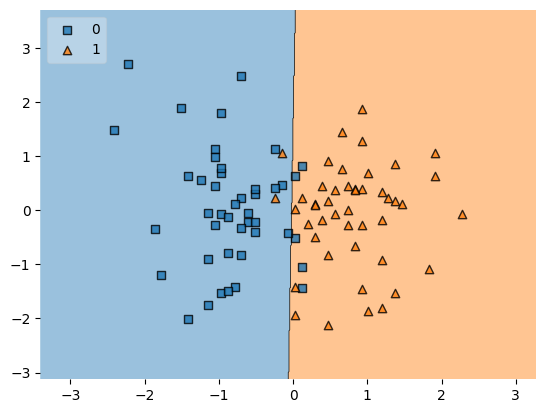

In [41]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [42]:
import pickle

In [43]:
pickle.dump(clf,open('model.pkl','wb'))

#To use pickle in Python, we must first create an object like my_object (here clf). Then, using the dump() function and the 'wb' parameter on open(),
#we can serialize this object to a file called my_object. pickle for future usage. This binary write mode ensures that our data is secure and stored correctly for later access